In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
cpi_data = pd.read_csv('../data/CPI_cleaned_data_daily.csv')
exchange_rate_data = pd.read_csv('../data/Exchange_Rate_cleaned_data_daily.csv')
gdp_data = pd.read_csv('../data/GDP_cleaned_data_daily.csv')
unemployment_data = pd.read_csv('../data/Unemployment_Rate_cleaned_data_daily.csv')
# Load the data
data = pd.read_csv('../data/brent_oil_price_cleaned.csv')  


In [49]:
# Standardize column names
cpi_data.rename(columns={'Date': 'Date', 'CPI': 'CPI'}, inplace=True)
exchange_rate_data.rename(columns={'Date': 'Date', 'Exchange Rate': 'Exchange_Rate'}, inplace=True)
gdp_data.rename(columns={'Date': 'Date', 'GDP': 'GDP'}, inplace=True)
unemployment_data.rename(columns={'Date': 'Date', 'Unemployment Rate': 'Unemployment_Rate'}, inplace=True)

# Standardize column names for oil price data
data.rename(columns={'Date': 'Date', 'Price': 'Price'}, inplace=True)

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Convert 'Date' to datetime
cpi_data['Date'] = pd.to_datetime(cpi_data['Date'])
exchange_rate_data['Date'] = pd.to_datetime(exchange_rate_data['Date'])
gdp_data['Date'] = pd.to_datetime(gdp_data['Date'])
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'])

# Create a dictionary to store the dataframes
data_frames = {
    'CPI': cpi_data,
    'Exchange_Rate': exchange_rate_data,
    'GDP': gdp_data,
    'Unemployment_Rate': unemployment_data,
    'Price': data,
}

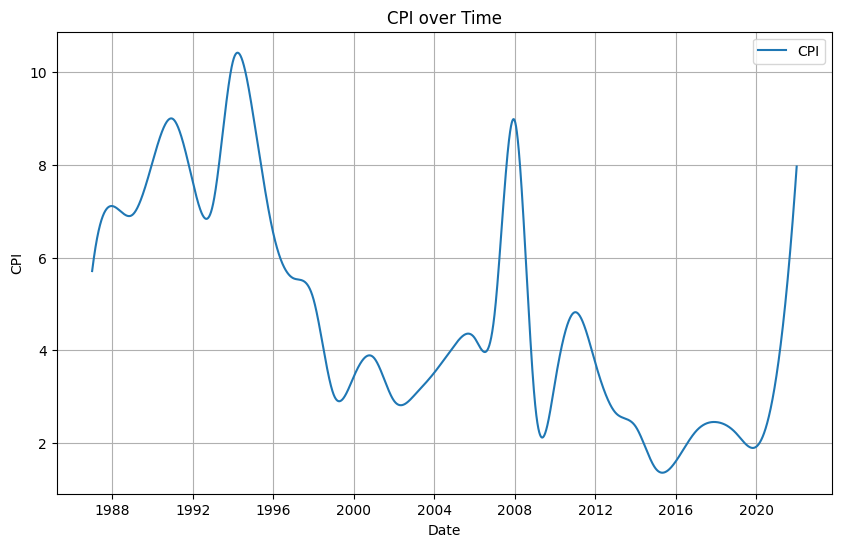

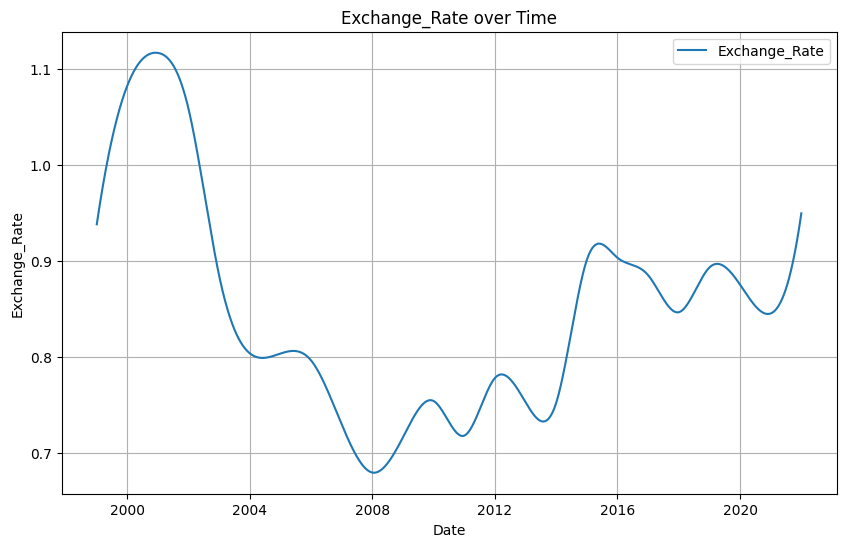

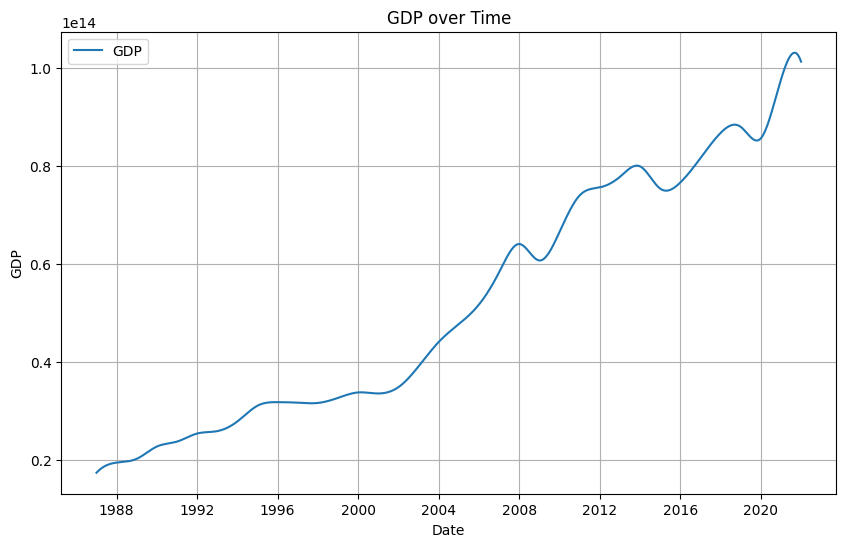

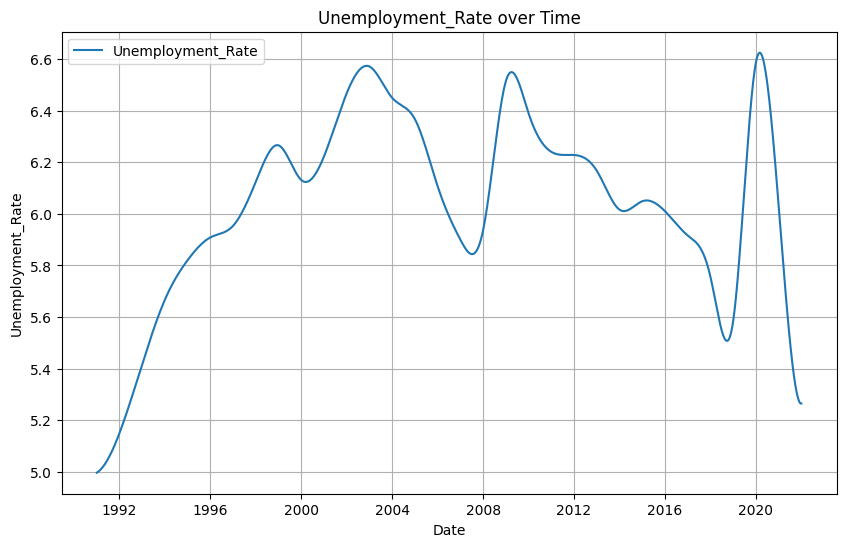

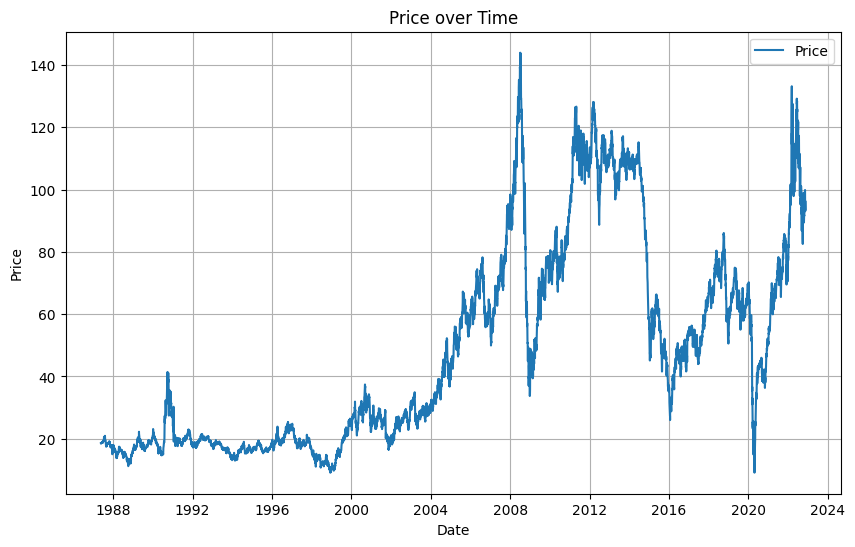

In [50]:

# Plot each indicator
for name, df in data_frames.items():
    if not df.empty:
        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df[name], label=name)
        plt.title(f'{name} over Time')
        plt.xlabel('Date')
        plt.ylabel(name)
        plt.legend()
        plt.grid(True)
        plt.show()

Correlation matrix:
     GDP
GDP  1.0


c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966:

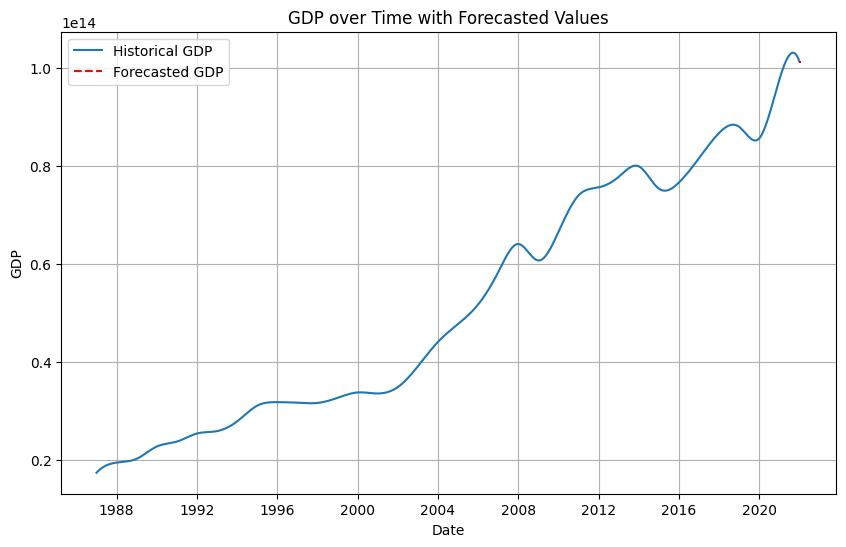

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy.linalg import LinAlgError
#from statsmodels.stats.diagnostic import collinearity_matrix

# Load your GDP data
gdp_data = pd.read_csv('../data/GDP_cleaned_data_daily.csv', index_col='Date', parse_dates=True)

# Check for constant variables
constant_cols = gdp_data.columns[gdp_data.std(axis=0) == 0]
if len(constant_cols) > 0:
    print(f"Warning: Found constant variables: {constant_cols}")
    # Consider removing constant variables or transforming them

correlation_matrix = gdp_data.corr()
print(f"Correlation matrix:\n{correlation_matrix}")

# Fit the ARIMA model
try:
    model = ARIMA(gdp_data['GDP'], order=(1, 1, 0))  # Adjust parameters as needed
    model_fit = model.fit()
except LinAlgError as e:
    print(f"Error fitting ARIMA model: {e}")
    # Consider alternative model specifications or data transformations
else:
    # Forecast the next 30 days
    forecast_steps = 30
    forecast = model_fit.forecast(steps=forecast_steps)

    # Create a date range for the forecasted data (next 30 days)
    forecast_dates = pd.date_range(gdp_data.index.max(), periods=forecast_steps + 1, freq='D')[1:]

    # Plot the historical and forecasted GDP
    plt.figure(figsize=(10, 6))
    plt.plot(gdp_data.index, gdp_data['GDP'], label='Historical GDP')
    plt.plot(forecast_dates, forecast, label='Forecasted GDP', linestyle='--', color='red')
    plt.title('GDP over Time with Forecasted Values')
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy.linalg import LinAlgError  # Import for error handling

# Load your GDP data
gdp_data = pd.read_csv('../data/GDP_cleaned_data_daily.csv', index_col='Date', parse_dates=True)

# Check for stationarity (optional)
# ... (implement stationarity checks using Dickey-Fuller test or similar methods)

# Calculate correlation matrix
correlation_matrix = gdp_data.corr()
print(f"Correlation matrix:\n{correlation_matrix}")

# Explore different ARIMA models
for order in [(1, 1, 0), (2, 1, 0), (5, 1, 0)]:  # Try different orders
    try:
        model = ARIMA(gdp_data['GDP'], order=order)
        model_fit = model.fit()
        print(f"ARIMA Model (order: {order}) fit successfully!")
        break  # Exit loop on successful fit
    except LinAlgError as e:
        print(f"Error fitting ARIMA model (order: {order}): {e}")

Correlation matrix:
     GDP
GDP  1.0


c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966:

ARIMA Model (order: (1, 1, 0)) fit successfully!


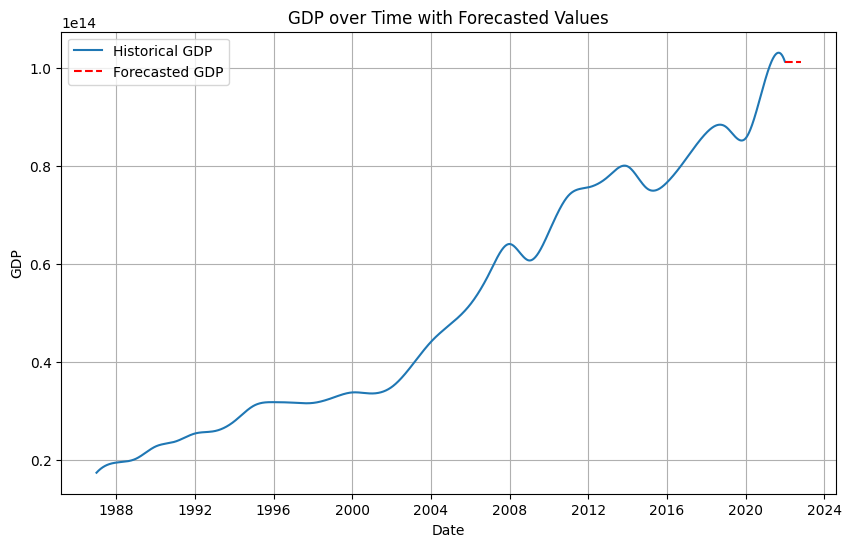

In [30]:
forecast_steps = 300
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted data (next 30 days)
forecast_dates = pd.date_range(gdp_data.index.max(), periods=forecast_steps + 1, freq='D')[1:]

# Plot the historical and forecasted GDP
plt.figure(figsize=(10, 6))
plt.plot(gdp_data.index, gdp_data['GDP'], label='Historical GDP')
plt.plot(forecast_dates, forecast, label='Forecasted GDP', linestyle='--', color='red')
plt.title('GDP over Time with Forecasted Values')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

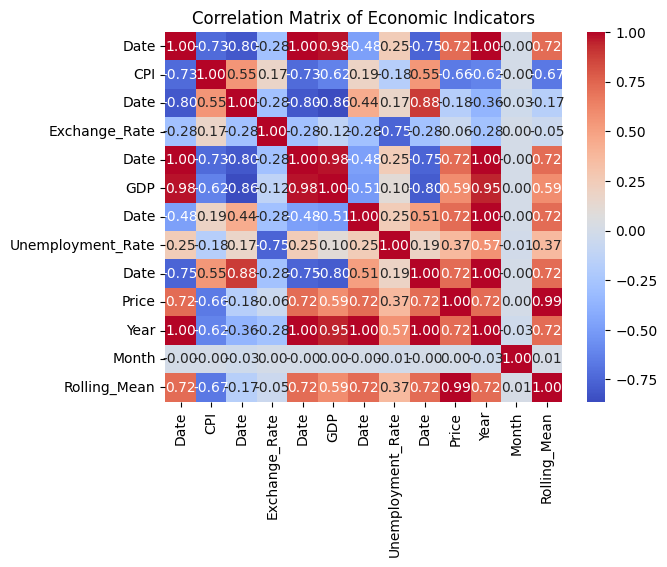

<Figure size 1500x1500 with 0 Axes>

In [55]:
correlation_matrix = pd.concat(data_frames.values(), axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Economic Indicators')
plt.figure(figsize=(15, 15)) 
plt.show()

Analyzing the Price-Related Correlations in the Economic Indicators
Focusing on Price and Its Relationships

Based on the provided correlation matrix, we can delve deeper into the relationships between the "Price" variable and other economic indicators.

Key Observations:

- Strong Positive Correlation with Date:

This indicates a consistent upward trend in prices over time. This could be due to factors like inflation, economic growth, or policy changes.
- Moderate Positive Correlation with GDP:

This suggests that as the economy grows (higher GDP), prices tend to increase. This could be attributed to increased demand, higher production costs, or inflationary pressures.
- Moderate Positive Correlation with CPI:

A positive correlation between price and CPI is expected, as both are measures of price levels. This indicates that as the general price level (CPI) increases, the prices of specific goods and services also tend to rise.
- Moderate Positive Correlation with Exchange Rate:

This suggests that a weaker domestic currency (higher exchange rate) can lead to higher prices of imported goods, contributing to overall price inflation.
- Implications for Analysis and Decision-Making:

- Inflationary Trends: The strong positive correlation between date and price, combined with the moderate positive correlation between CPI and price, suggests inflationary pressures. This information can be crucial for policymakers to monitor and implement appropriate monetary and fiscal policies.

- Economic Growth and Price Levels: The positive correlation between GDP and price indicates that economic growth can lead to higher prices. However, it's important to distinguish between healthy price increases due to increased demand and unhealthy inflationary pressures.

- Exchange Rate Impact: The positive correlation between exchange rate and price highlights the impact of exchange rate fluctuations on domestic prices. A weaker currency can lead to imported inflation, affecting the purchasing power of consumers.

In [32]:
# Assuming 'Date' is the common column to merge on and all datasets have this column
# Merge the datasets on the 'Date' column
processed_df = pd.merge(cpi_data, exchange_rate_data, on='Date', how='inner')
processed_df = pd.merge(processed_df, gdp_data, on='Date', how='inner')
processed_df = pd.merge(processed_df, unemployment_data, on='Date', how='inner')


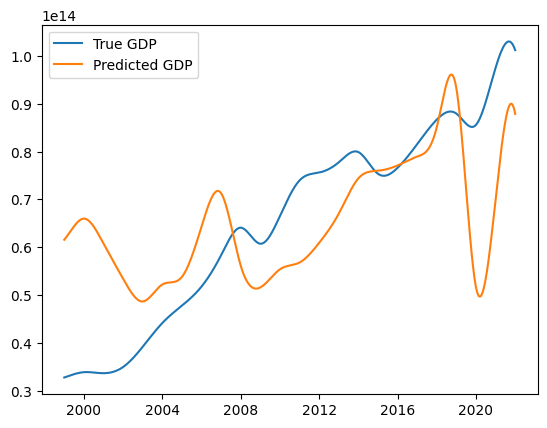

In [33]:
from sklearn.linear_model import LinearRegression

# Prepare the data: Use CPI and Unemployment Rate to predict GDP
X = processed_df[['CPI', 'Unemployment_Rate']]
y = processed_df['GDP']
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
plt.plot(processed_df['Date'], y, label='True GDP')
plt.plot(processed_df['Date'], predictions, label='Predicted GDP')
plt.legend()
plt.show()


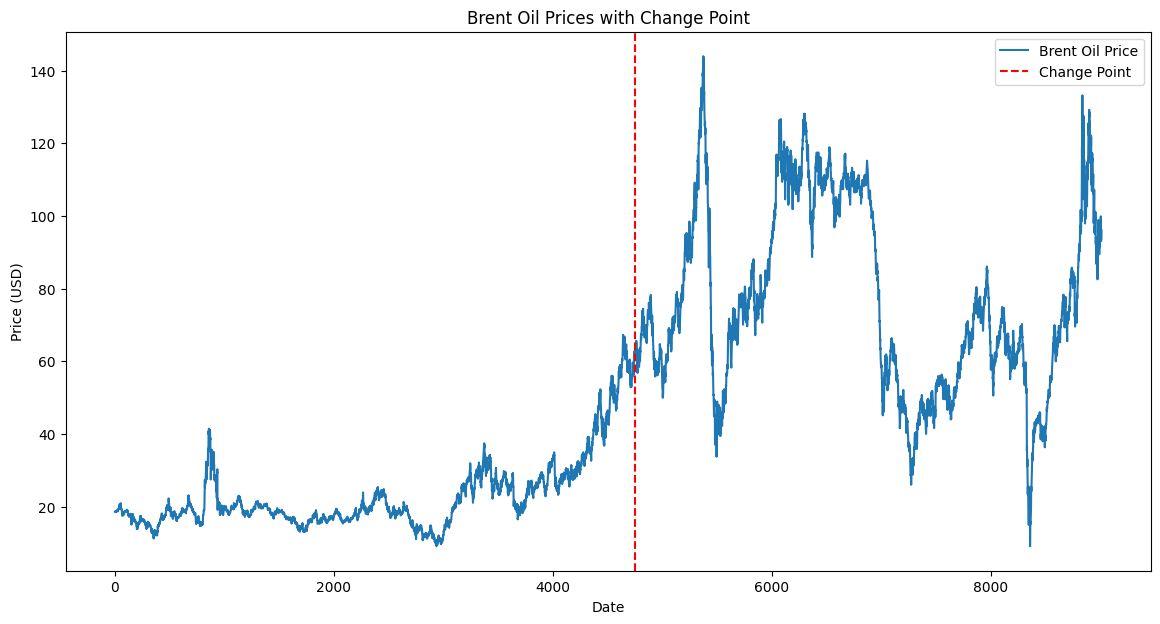

In [62]:
change_point_index = 4753

# Plot the data with the change point
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
plt.axvline(x=data.index[change_point_index], color='red', linestyle='--', label='Change Point')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices with Change Point')
plt.legend()
plt.show()

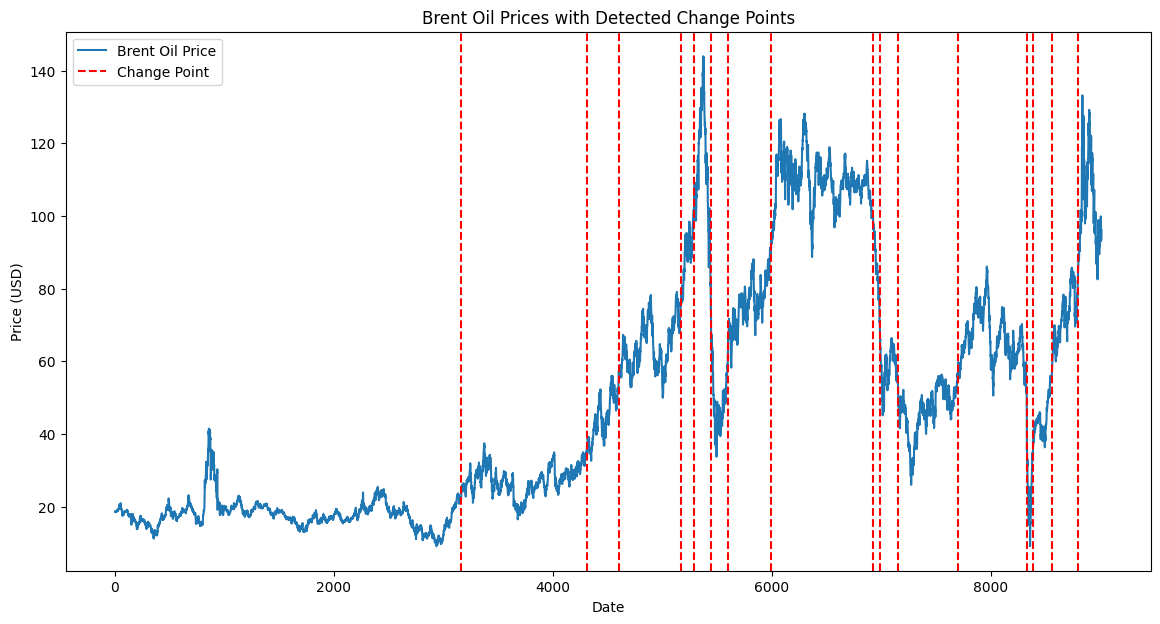

In [63]:
import ruptures as rpt # Now this line should work without error
price_array = data['Price'].values
model = "rbf"
algo = rpt.Pelt(model=model).fit(price_array)
change_points = algo.predict(pen=20)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
for cp in change_points[:-1]:
    plt.axvline(x=data.index[cp], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices with Detected Change Points')
plt.legend()
plt.show()

Analyzing the Brent Oil Price Chart with Change Points
Understanding the Chart

The provided chart visualizes the historical Brent oil price over time, along with detected change points. Change points represent significant shifts or structural breaks in the data series, indicating potential regime changes in the oil market.

Key Observations:

1. Volatility: The chart demonstrates significant volatility in oil prices, with periods of sharp increases and decreases. This reflects the influence of various factors, including geopolitical events, economic conditions, and supply-demand imbalances.

Change Points: The vertical red lines indicate the detected change points. These points signify instances where the underlying pattern or trend in the data has shifted.

2. Trend Analysis:

- Upward Trends: There are several periods of sustained upward trends in oil prices, often associated with periods of economic growth and increased global demand.
- Downward Trends: Conversely, there have been periods of downward trends, which can be attributed to factors like economic recessions, increased supply, or geopolitical events that reduce demand.